In [1]:
# install necessary packages
#
##!pip install matplotlib seaborn tabulate pandas
#!pip install matplotlib
#!pip install seaborn
#!pip install tabulate
##!pip install pandas


# Data Understanding

(This document relates to question number 2)

- What pedagogical strategies developed by teachers seem to promote better reading performance (PISA 2018 - teacher context data)?
- What pedagogical strategies, according to the students' perspective, seem to promote better reading performance (PISA 2018 - student context data)?
- Do teachers and students have the same perceptions?

## **2.1 Collect Initial Data**

For this question we're using 2 datasets (https://www.oecd.org/en/data/datasets/pisa-2022-database.html):
- Students database 2018 (PISA)
- Teachers database 2018 (PISA)

this file only uses the students, for the teacher section see ([Data Understanding - Teacher](./data_understanding_teacher.ipynb))

The source datasets are in .sas7bdat format, that we converted to .csv with the following command:

In [2]:
"""
data = pd.read_sas(
    "../../../databases/2018/cy07_msu_stu_qqq.sas7bdat", format="sas7bdat"
)

data.to_csv("../../../databases/2018/student2018.csv", index=False)

data = pd.read_sas(
    "../../../databases/2018/cy07_msu_tch_qqq.sas7bdat", format="sas7bdat"
)

data.to_csv("../../../databases/2018/only_teacher2018.csv", index=False)
"""

'\ndata = pd.read_sas(\n    "../../../databases/2018/cy07_msu_stu_qqq.sas7bdat", format="sas7bdat"\n)\n\ndata.to_csv("../../../databases/2018/student2018.csv", index=False)\n\ndata = pd.read_sas(\n    "../../../databases/2018/cy07_msu_tch_qqq.sas7bdat", format="sas7bdat"\n)\n\ndata.to_csv("../../../databases/2018/only_teacher2018.csv", index=False)\n'

In [3]:
import pandas as pd

#student = pd.read_csv('../../../databases/2018/student2018.csv', nrows=1000)
student = pd.read_csv('../../../databases/2018/student2018.csv')

**Note:** We don't include these files in the project folder, so it's necessary to manually download and put them in their respective folder.

## **2.2 Describe Data**

The original dataset has 1119 features

In [4]:
student.head()

,CNTRYID,CNT,CNTSCHID,CNTSTUID,CYC,NatCen,STRATUM,SUBNATIO,OECD,ADMINMODE,...,PV4RTML,PV5RTML,PV6RTML,PV7RTML,PV8RTML,PV9RTML,PV10RTML,SENWT,VER_DAT,i
0,8.0,b'ALB',800115.0,800001.0,b'07MS',b'000800',b'ALB0107',b'0080000',0.0,2.0,...,325.281,370.041,358.524,345.833,380.064,357.376,385.496,0.48064,b' 09MAY19:11:20:53',31.0
1,8.0,b'ALB',800300.0,800002.0,b'07MS',b'000800',b'ALB0105',b'0080000',0.0,2.0,...,337.259,294.530,325.444,367.058,333.356,367.616,334.448,1.30666,b' 09MAY19:11:20:54',31.0
2,8.0,b'ALB',800088.0,800003.0,b'07MS',b'000800',b'ALB0101',b'0080000',0.0,2.0,...,297.929,269.282,293.719,314.027,295.519,283.143,315.992,0.67391,b' 09MAY19:11:20:54',31.0
3,8.0,b'ALB',800014.0,800004.0,b'07MS',b'000800',b'ALB0109',b'0080000',0.0,2.0,...,349.369,333.416,320.410,388.597,324.419,372.543,355.213,0.68250,b' 09MAY19:11:20:53',31.0
4,8.0,b'ALB',800294.0,800005.0,b'07MS',b'000800',b'ALB0203',b'0080000',0.0,2.0,...,461.508,464.534,461.681,455.574,430.815,476.752,482.148,0.63579,b' 09MAY19:11:20:53',31.0


In [5]:
student.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612004 entries, 0 to 612003
Data columns (total 1119 columns):
 #     Column        Non-Null Count   Dtype  
---    ------        --------------   -----  
 0     CNTRYID       612004 non-null  float64
 1     CNT           612004 non-null  object 
 2     CNTSCHID      612004 non-null  float64
 3     CNTSTUID      612004 non-null  float64
 4     CYC           612004 non-null  object 
 5     NatCen        612004 non-null  object 
 6     STRATUM       612004 non-null  object 
 7     SUBNATIO      612004 non-null  object 
 8     OECD          612004 non-null  float64
 9     ADMINMODE     612004 non-null  float64
 10    LANGTEST_QQQ  606279 non-null  float64
 11    LANGTEST_COG  612004 non-null  float64
 12    LANGTEST_PAQ  93706 non-null   float64
 13    BOOKID        612004 non-null  float64
 14    ST001D01T     612004 non-null  float64
 15    ST003D02T     600687 non-null  float64
 16    ST003D03T     612004 non-null  float64
 17    ST004D

Decode keys

In [6]:
import sys
import os

# Add the src directory to the Python path
sys.path.append(os.path.abspath('../../../src')) # Add the src directory to the Python path

from pisadatamap.pisadatamap import PISADataMap

data_map = PISADataMap('../../../databases/2018/student_data_structure_2018.csv')

for column in data_map.map_enum:
    print(f"\033[1m{column.name}\033[0m: {column.value}")

CNTRYID: Country Identifier
CNT: Country code 3-character
CNTSCHID: Intl. School ID
CNTSTUID: Intl. Student ID
CYC: PISA Assessment Cycle (2 digits + 2 character Assessment type - MS/FT)
NatCen: National Centre 6-digit Code
STRATUM: Stratum ID 7-character (cnt + region ID + original stratum ID)
SUBNATIO: Adjudicated sub-region code 7-digit code (3-digit country code + region ID + stratum ID)
OECD: OECD country
ADMINMODE: Mode of Respondent
LANGTEST_QQQ: Language of Questionnaire
LANGTEST_COG: Language of Assessment
LANGTEST_PAQ: Language of Assessment (PAQ)
BOOKID: Form Identifier
ST001D01T: Student International Grade (Derived)
ST003D02T: Student (Standardized) Birth - Month
ST003D03T: Student (Standardized) Birth -Year
ST004D01T: Student (Standardized) Gender
ST005Q01TA: What is the <highest level of schooling> completed by your mother?
ST006Q01TA: Does your mother have this qualification? <ISCED level 6> (incl. higher qualifications at level 5A in some countries)
ST006Q02TA: Does yo

The dataset is composed by 1103 numeric columns and only 16 categorical columns.


In [7]:
import pandas as pd
from tabulate import tabulate

categorical_columns = student.select_dtypes(include=["object", "category"]).columns
numeric_columns = student.select_dtypes(include=["int64", "float64"]).columns

column_types_df = pd.DataFrame(
    {
        "Column type": ["Numeric", "Categorical"],
        "Number of columns": [len(numeric_columns), len(categorical_columns) ],
        "Column names": [
            ", ".join(numeric_columns),
            ", ".join(categorical_columns),
        ],
    }
)

print(
    tabulate(
        column_types_df,
        headers="keys",
        tablefmt="pretty",
        showindex=False,
        colalign=("left", "left", "left"),
    )
)

+-------------+-------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [8]:
student.describe()

,CNTRYID,CNTSCHID,CNTSTUID,OECD,ADMINMODE,LANGTEST_QQQ,LANGTEST_COG,LANGTEST_PAQ,BOOKID,ST001D01T,...,PV3RTML,PV4RTML,PV5RTML,PV6RTML,PV7RTML,PV8RTML,PV9RTML,PV10RTML,SENWT,i
count,612004.000000,6.120040e+05,6.120040e+05,612004.000000,612004.000000,606279.000000,612004.000000,93706.000000,612004.000000,612004.000000,...,551930.000000,551930.000000,551930.000000,551930.000000,551930.000000,551930.000000,551930.000000,551930.000000,612004.000000,612004.0
mean,448.931030,4.489354e+07,4.490023e+07,0.481250,1.901841,321.202902,321.948267,232.529038,18.410911,11.077864,...,463.374699,463.264302,463.306010,463.149250,463.407820,463.471132,463.374083,463.430908,0.653590,31.0
std,269.865482,2.698691e+07,2.698768e+07,0.499649,0.297530,158.577368,161.453416,79.332138,15.087501,11.046151,...,110.411792,110.462719,110.462172,110.187115,110.504983,110.332022,110.391826,110.300336,0.414764,0.0
min,8.000000,8.000020e+05,8.000010e+05,0.000000,1.000000,113.000000,113.000000,130.000000,1.000000,7.000000,...,0.000000,56.015000,36.265000,17.996000,12.169000,34.006000,47.619000,53.210000,0.004780,31.0
25%,203.000000,2.030021e+07,2.030481e+07,0.000000,2.000000,156.000000,156.000000,156.000000,8.000000,9.000000,...,383.013000,382.848000,382.725000,382.813000,383.006000,383.065250,383.097000,383.171000,0.339500,31.0
50%,422.000000,4.220031e+07,4.220616e+07,0.000000,2.000000,313.000000,313.000000,232.000000,15.000000,10.000000,...,463.234500,463.248000,463.160500,463.063000,463.472000,463.546000,463.314500,463.338000,0.705490,31.0
75%,703.000000,7.030015e+07,7.030307e+07,1.000000,2.000000,451.000000,449.000000,301.000000,23.000000,10.000000,...,543.046750,542.986500,543.007000,542.831000,543.247000,543.111500,543.198750,543.046000,0.857630,31.0
max,983.000000,9.830081e+07,9.832912e+07,1.000000,2.000000,998.000000,998.000000,495.000000,99.000000,98.000000,...,878.282000,897.773000,911.648000,920.917000,935.439000,891.032000,884.818000,940.246000,9.168930,31.0


612004We can observe that there are a total of 612004 students, from which ~17% are repeating.

In [9]:
print(f"Total number of students: {len(student)}\n" )

not_repeating_students = student[student["REPEAT"] == 0]
print(f"Total number of non repeating students: {len(student[student["REPEAT"] == 0])}")
student_grades = student[student["REPEAT"] == 0]["ST001D01T"].value_counts().reset_index()
student_grades.columns = ["Grade", "Count"]
print(student_grades)
print("\n")

print(f"Total number of repeating students: {len(student[student["REPEAT"] == 1])}")
repeating_students_grades = student[student["REPEAT"] == 1]["ST001D01T"].value_counts().reset_index()
repeating_students_grades.columns = ["Grade", "Repeating"]
print(repeating_students_grades)

Total number of students: 612004

Total number of non repeating students: 507325
   Grade   Count
0   10.0  297398
1    9.0  146618
2   11.0   43232
3    8.0    7995
4   98.0    5771
5   12.0    2987
6   96.0    2552
7    7.0     763
8   13.0       9


Total number of repeating students: 68147
   Grade  Repeating
0    9.0      37642
1    8.0      13690
2   10.0      10940
3    7.0       3429
4   11.0       1259
5   98.0        889
6   96.0        242
7   12.0         56


## 2.3 Explore data

The question to explore:
 - What pedagogical strategies, according to the students' perspective, seem to promote better reading performance (PISA 2018 - student context data)?

The target variable in this analysis is the reading scores achieved by each student.

This score is calculated as the average of the values across all "Possible Reading Value" columns, which are represented in the dataset as PV1READ to PV10READ. These features are plausible values, each representing multiple estimates of the student's performance. Averaging them provides a more reliable and comprehensive measure of the student's grade.


In [10]:
"""
Setup average reading scores
"""

from columns_list_q2 import (
    reading_columns,
    get_avg_results,
    drop_columns
)

student = get_avg_results(student, reading_columns, "Reading", None)

In [11]:
student = drop_columns(student)

In [12]:
student["Avg Reading Result"].describe()

count    606627.000000
mean        456.109543
std         105.147426
min          70.284000
25%         379.464950
50%         456.091500
75%         532.671700
max         823.398500
Name: Avg Reading Result, dtype: float64

The scores go from 0 top 1000, we will group scores to analize the diferences between performances

5 (90-100%)
4 (70-89%)
3 (50-69%)
2 (20-49%)
1 (0-19%)

In [13]:
def categorize_reading_score(score):
    score = score/10
    if 90 <= score <= 100:
        return "Very Good (90-100%)"
    elif 70 <= score < 90:
        return "Good (70-89%)"
    elif 50 <= score < 70:
        return "Sufficient (50-69%)"
    elif 0 <= score < 50:
        return "Insufficient (0-49%)"

student['Reading Score Category'] = student['Avg Reading Result'].apply(categorize_reading_score)

print("Number of students by grade category:")
print("Very Good (90-100%): ", len(student[student['Reading Score Category']=="Very Good (90-100%)"]))
print("Good (70-89%): ", len(student[student['Reading Score Category']=="Good (70-89%)"]))
print("Sufficient (50-69%): ", len(student[student['Reading Score Category']=="Sufficient (50-69%)"]))
print("Insufficient (0-49%): ", len(student[student['Reading Score Category']=="Insufficient (0-49%)"]))

Number of students by grade category:
Very Good (90-100%):  0
Good (70-89%):  3294
Sufficient (50-69%):  209634
Insufficient (0-49%):  393699


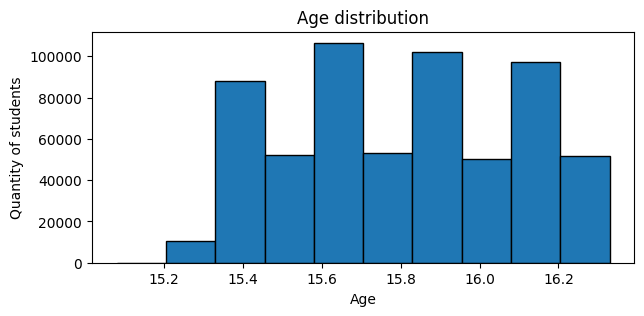

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 3))
plt.hist(student["AGE"], bins=10, edgecolor='black')
plt.title("Age distribution")
plt.ylabel("Quantity of students")
plt.xlabel("Age")
plt.show()


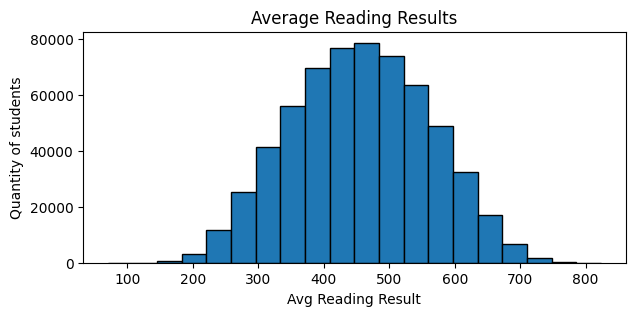

In [15]:
plt.figure(figsize=(7, 3))
plt.hist(student["Avg Reading Result"], bins=20, edgecolor='black')
plt.title("Average Reading Results")
plt.ylabel("Quantity of students")
plt.xlabel("Avg Reading Result")
plt.show()

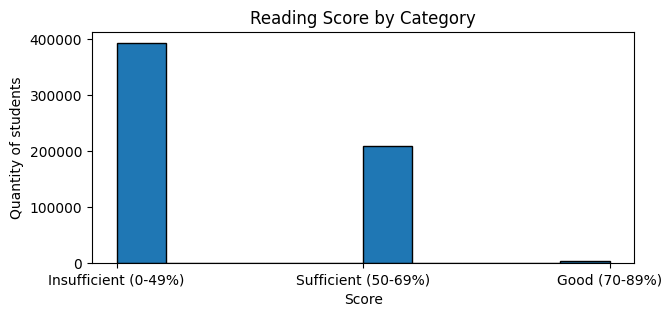

In [16]:
# Drop rows where 'Reading Score Category' is missing
student_cleaned = student.dropna(subset=['Reading Score Category'])

# Plot the histogram
plt.figure(figsize=(7, 3))
plt.hist(student_cleaned["Reading Score Category"], edgecolor='black')
plt.title("Reading Score by Category")
plt.ylabel("Quantity of students")
plt.xlabel("Score")
plt.show()

del student_cleaned

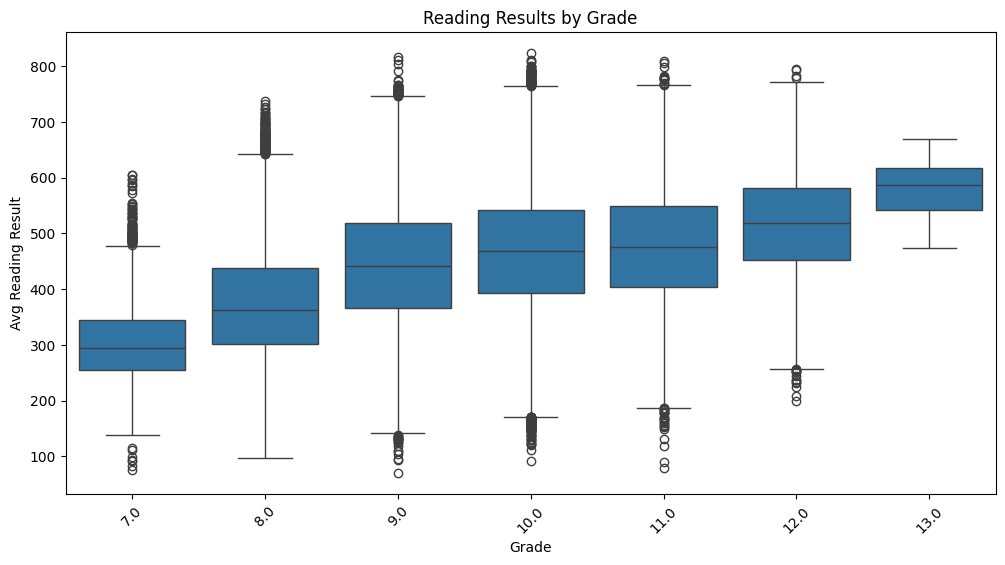

In [17]:
# 11. Relação entre Age_Category e Weight_(kg)
plt.figure(figsize=(12, 6))
# do not include non grade values
sns.boxplot(x='ST001D01T', y="Avg Reading Result", data=student[~student['ST001D01T'].between(90, 100)])
plt.title("Reading Results by Grade")
plt.xlabel("Grade")
plt.ylabel("Avg Reading Result")
plt.xticks(rotation=45)
plt.show()

If we separate the more advanced grades (11th, 12th and 13th) by country, we can clearly observe that the majority of students are English.

This can be justified because of the way that the english teaching system works. See: https://b28mathstutor.co.uk/how-the-english-school-system-works/#:~:text=Unlike%20in%20some%20countries%2C%20students,1%2C%20also%20known%20as%20Infants

This difference may lead to a disproportionate representation of students and we should consider them as an exception in the next phase.

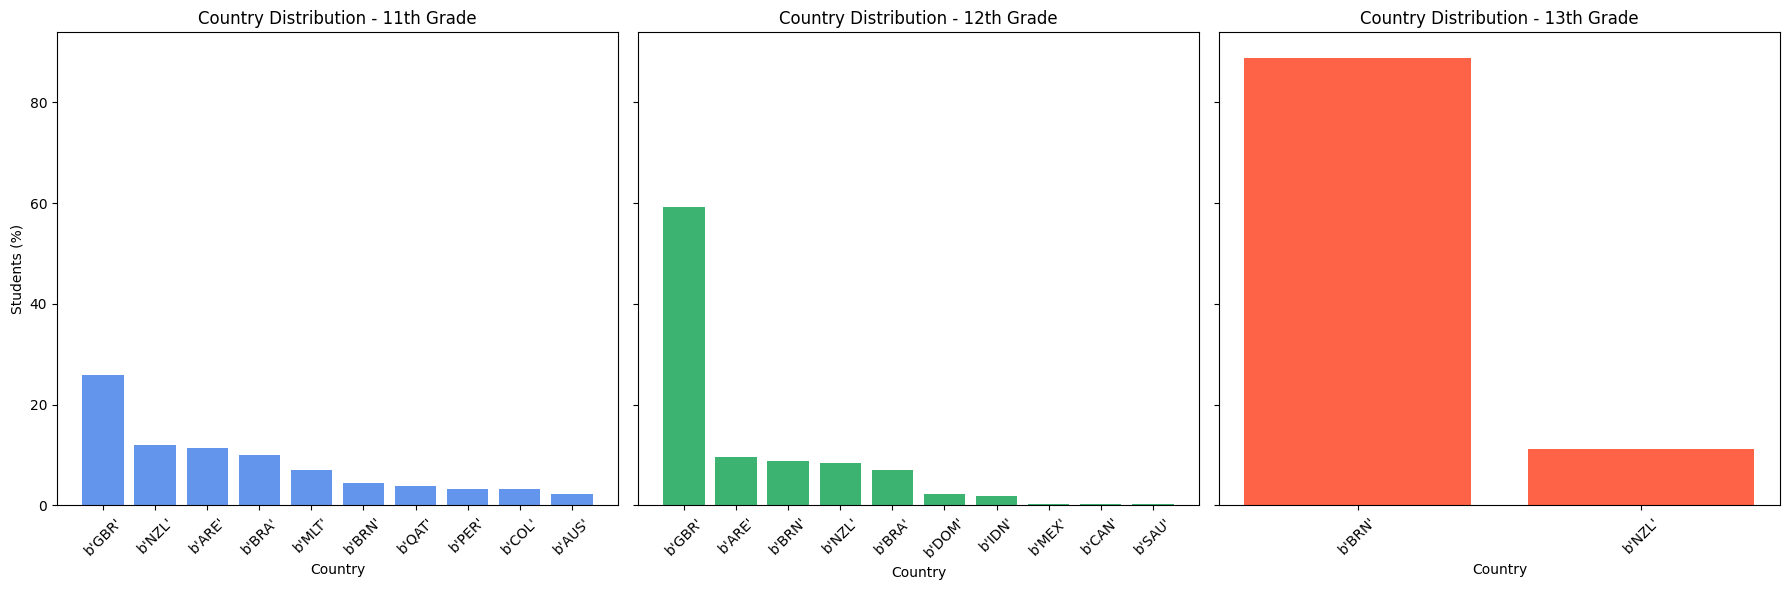

In [18]:
import matplotlib.pyplot as plt

def filter_by_grade(dataframe, grade):
    return dataframe[dataframe["ST001D01T"] == grade]

grade_11 = filter_by_grade(student, 11)
grade_12 = filter_by_grade(student, 12)
grade_13 = filter_by_grade(student, 13)

grade_11_counts = grade_11["CNT"].value_counts(normalize=True).mul(100).head(10)
grade_12_counts = grade_12["CNT"].value_counts(normalize=True).mul(100).head(10)
grade_13_counts = grade_13["CNT"].value_counts(normalize=True).mul(100).head(10)

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

axes[0].bar(grade_11_counts.index, grade_11_counts.values, color="cornflowerblue")
axes[0].set_title("Country Distribution - 11th Grade")
axes[0].set_xlabel("Country")
axes[0].set_ylabel("Students (%)")
axes[0].tick_params(axis="x", rotation=45)
axes[0].set_ylim(
    0, max(grade_11_counts.max(), grade_12_counts.max(), grade_13_counts.max()) + 5
)

axes[1].bar(grade_12_counts.index, grade_12_counts.values, color="mediumseagreen")
axes[1].set_title("Country Distribution - 12th Grade")
axes[1].set_xlabel("Country")
axes[1].tick_params(axis="x", rotation=45)

axes[2].bar(grade_13_counts.index, grade_13_counts.values, color="tomato")
axes[2].set_title("Country Distribution - 13th Grade")
axes[2].set_xlabel("Country")
axes[2].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()


It is also essential to examine the correlation between all dataset features and the target variable (Avg Reading Result). This helps identify which features are strongly associated with students performance and can be considered in the next step for feature selection.

We computed this correlation, and the top 20 features were visualized in a table.

In [19]:
correl = (
    student.corr(numeric_only=True)["Avg Reading Result"]
    .abs()
    .sort_values(ascending=False)
)

Correlation top features based on "Avg Reading Result"

In [20]:
top_corr = correl.drop("Avg Reading Result").head(30)

top_corr_df = top_corr.reset_index()

top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")

top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)


,Feature,Correlation with Reading Result,Description
0,METASPAM,0.456116,Meta-cognition: assess credibility
1,PA042Q01TA,0.429466,What is your annual household income?
2,METASUM,0.418597,Meta-cognition: summarising
3,ESCS,0.409361,"Index of economic, social and cultural status"
4,HOMEPOS,0.404923,Home possessions (WLE)
5,PISADIFF,0.404541,Perception of difficulty of the PISA test (WLE)
6,ST013Q01TA,0.392740,How many books are there in your home?
7,ST197Q01HA,0.365021,How informed are you about the following topic...
8,ST163Q03HA,0.362116,"In the PISA test, how do you feel about the re..."
9,EC154Q01IA,0.360050,Do you currently attend additional instruction...


**Correlation of reading by score category**

Correlation only for students in "Very Good (90-100%)" category

In [21]:
correl = student[student["Reading Score Category"] == "Very Good (90-100%)"].corr(numeric_only=True)["Avg Reading Result"].abs().sort_values(ascending=False)
top_corr = correl.drop("Avg Reading Result").head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

#plt.figure(figsize=(14,14))
#sns.heatmap(corr);

,Feature,Correlation with Reading Result,Description
0,CNTRYID,NaN,Country Identifier
1,CNTSCHID,NaN,Intl. School ID
2,CNTSTUID,NaN,Intl. Student ID
3,OECD,NaN,OECD country
4,ADMINMODE,NaN,Mode of Respondent
5,LANGTEST_QQQ,NaN,Language of Questionnaire
6,LANGTEST_COG,NaN,Language of Assessment
7,LANGTEST_PAQ,NaN,Language of Assessment (PAQ)
8,BOOKID,NaN,Form Identifier
9,ST001D01T,NaN,Student International Grade (Derived)


Correlation only for students in "Good (70-89%)" category

In [22]:
correl = student[student["Reading Score Category"] == "Good (70-89%)"].corr(numeric_only=True)["Avg Reading Result"].abs().sort_values(ascending=False)
top_corr = correl.drop("Avg Reading Result").head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,PA160Q04HA,0.170671,How often do you read these types of texts bec...
1,WB162Q01HA,0.163216,How easy is it for you to talk to the followin...
2,WB178Q05HA,0.160748,The following questions refer to your day yest...
3,PA159Q01HA,0.159228,About how much time do you usually spend readi...
4,PA154Q06IA,0.150709,When child attended the first year of <ISCED 1...
5,PA006Q08TA,0.148642,Importance for choosing a school: The school h...
6,PA171Q03HA,0.146443,Involved in: I choose certain products for eth...
7,PA158Q03HA,0.137378,Statements about reading? I like talking about...
8,WB166Q03HA,0.136702,How did you feel the last time you attended a ...
9,FL164Q16HA,0.132405,"School lessons in the last 12 months, have you..."


Correlation only for students in "Sufficient (50-69%)" category


In [23]:
correl = student[student["Reading Score Category"] == "Sufficient (50-69%)"].corr(numeric_only=True)["Avg Reading Result"].abs().sort_values(ascending=False)
top_corr = correl.drop("Avg Reading Result").head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,METASPAM,0.282926,Meta-cognition: assess credibility
1,ST166Q03HA,0.254139,How appropriate in reaction to this email: Cli...
2,ST013Q01TA,0.249801,How many books are there in your home?
3,PISADIFF,0.240885,Perception of difficulty of the PISA test (WLE)
4,ST163Q02HA,0.223576,"In the PISA test, how do you feel about the re..."
5,SCREADCOMP,0.219366,Self-concept of reading: Perception of compete...
6,JOYREAD,0.216160,Joy/Like reading (WLE)
7,ST163Q03HA,0.213033,"In the PISA test, how do you feel about the re..."
8,ESCS,0.211727,"Index of economic, social and cultural status"
9,ST196Q02HA,0.208727,How easy to perform on your own: Explain how c...


Correlation only for students in "Insufficient (0-49%)" category

In [24]:
correl = student[student["Reading Score Category"] == "Insufficient (0-49%)"].corr(numeric_only=True)["Avg Reading Result"].abs().sort_values(ascending=False)
top_corr = correl.drop("Avg Reading Result").head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,EC154Q01IA,0.325128,Do you currently attend additional instruction...
1,EC154Q05IA,0.295588,Do you currently attend additional instruction...
2,WB173Q03HA,0.284459,How did you feel the last time you spent time ...
3,ST197Q01HA,0.276362,How informed are you about the following topic...
4,ST012Q05NA,0.270895,How many in your home: <Cell phones> with Inte...
5,WB171Q03HA,0.268600,Now think of the last time you had a break bet...
6,HOMEPOS,0.268391,Home possessions (WLE)
7,ST207Q03HA,0.267936,Agree: It is a wrong thing to join in bullying.
8,WB173Q01HA,0.265388,How did you feel the last time you spent time ...
9,REPEAT,0.261078,Grade Repetition


Due to some categories being NaN, instead of comparing with student score, in the next section we're comparing by classification (meaning for example the best 10% of students are very good, instead of students with score between 900 and 1000)

In [25]:
def categorize_reading_students_by_performance(df):
    # Sort the DataFrame by 'Avg Reading Result' in descending order
    df = df.sort_values(by='Avg Reading Result', ascending=False).reset_index(drop=True)

    # Calculate the number of students
    total_students = len(df)

    # Define the percentage thresholds
    very_good_threshold = int(total_students * 0.90)
    good_threshold = int(total_students * 0.70)
    sufficient_threshold = int(total_students * 0.50)

    # Assign categories from highest to lowest
    df.loc[0:sufficient_threshold-1, 'Reading Score Classification'] = 'Insufficient (0-49%)'
    df.loc[sufficient_threshold:good_threshold-1, 'Reading Score Classification'] = 'Sufficient (50-69%)'
    df.loc[good_threshold:very_good_threshold-1, 'Reading Score Classification'] = 'Good (70-89%)'
    df.loc[very_good_threshold:, 'Reading Score Classification'] = 'Very Good (90-100%)'

    return df

student = categorize_reading_students_by_performance(student)

print("Number of students by classification")
print("Very Good (90-100%): ", len(student[student['Reading Score Classification']=="Very Good (90-100%)"]))
print("Good (70-89%): ", len(student[student['Reading Score Classification']=="Good (70-89%)"]))
print("Sufficient (50-69%): ", len(student[student['Reading Score Classification']=="Sufficient (50-69%)"]))
print("Insufficient (0-49%): ", len(student[student['Reading Score Classification']=="Insufficient (0-49%)"]))


Number of students by classification
Very Good (90-100%):  61201
Good (70-89%):  122401
Sufficient (50-69%):  122400
Insufficient (0-49%):  306002


Correlation only for students in "Very Good (90-100%)" classification

In [26]:
correl = student[student["Reading Score Classification"]=="Very Good (90-100%)"].corr(numeric_only=True)["Avg Reading Result"].abs().sort_values(ascending=False)

top_corr = correl.drop(["Avg Reading Result"]).head(20)

# Convert to DataFrame
top_corr_df = top_corr.reset_index()
top_corr_df.columns = ["Feature", "Correlation with Reading Result"]


top_corr_df["Description"] = top_corr_df["Feature"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,ST127Q02TA,0.216034,Have you ever repeated a <grade>? At <ISCED 2>
1,REPEAT,0.193053,Grade Repetition
2,ST127Q03TA,0.188222,Have you ever repeated a <grade>? At <ISCED 3>
3,ST006Q01TA,0.174590,Does your mother have this qualification? <ISC...
4,ST176Q02IA,0.174535,How often involved in: <Chat on line> (e.g. <W...
5,ST008Q01TA,0.173946,Does your father have this qualification? <ISC...
6,ST127Q01TA,0.167272,Have you ever repeated a <grade>? At <ISCED 1>
7,SWBP,0.166800,Subjective well-being: Positive affect (WLE)
8,ST188Q01HA,0.162929,Agree: I usually manage one way or another.
9,ST185Q01HA,0.158951,Agree: My life has clear meaning or purpose.


Correlation only for students in "Good (70-89%)" classification

In [27]:
correl = student[student['Reading Score Classification'] == "Good (70-89%)"].corr(numeric_only=True)["Avg Reading Result"].abs().sort_values(ascending=False)
top_corr = correl.drop("Avg Reading Result").head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,WB173Q03HA,0.140208,How did you feel the last time you spent time ...
1,WB171Q03HA,0.132987,Now think of the last time you had a break bet...
2,WB171Q02HA,0.132101,Now think of the last time you had a break bet...
3,EC154Q01IA,0.129776,Do you currently attend additional instruction...
4,EC154Q05IA,0.121275,Do you currently attend additional instruction...
5,WB173Q01HA,0.115885,How did you feel the last time you spent time ...
6,ST038Q05NA,0.112129,"During the past 12 months, how often: I was th..."
7,ST038Q07NA,0.109644,"During the past 12 months, how often: I got hi..."
8,EC154Q07IA,0.108389,Do you currently attend additional instruction...
9,FL164Q12HA,0.107577,"School lessons in the last 12 months, have you..."


Correlation only for students in "Sufficient (50-69%)" classification


In [28]:
correl = student[student['Reading Score Classification'] == "Sufficient (50-69%)"].corr(numeric_only=True)["Avg Reading Result"].abs().sort_values(ascending=False)
top_corr = correl.drop("Avg Reading Result").head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,EC154Q01IA,0.094617,Do you currently attend additional instruction...
1,METASUM,0.093108,Meta-cognition: summarising
2,HOMEPOS,0.089510,Home possessions (WLE)
3,ESCS,0.088136,"Index of economic, social and cultural status"
4,METASPAM,0.085355,Meta-cognition: assess credibility
5,EC163Q01HA,0.082489,Why did you study before or after school? I wa...
6,EC163Q05HA,0.081176,Why did you study before or after school? All ...
7,EC154Q05IA,0.077907,Do you currently attend additional instruction...
8,PA161Q01HA,0.076786,How often are you involved in reading activiti...
9,PA042Q01TA,0.075936,What is your annual household income?


Correlation only for students in "Insufficient (0-49%)" classification


In [29]:
correl = student[student['Reading Score Classification'] == "Insufficient (0-49%)"].corr(numeric_only=True)["Avg Reading Result"].abs().sort_values(ascending=False)
top_corr = correl.drop("Avg Reading Result").head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,METASPAM,0.361282,Meta-cognition: assess credibility
1,ST166Q03HA,0.320091,How appropriate in reaction to this email: Cli...
2,ST013Q01TA,0.304726,How many books are there in your home?
3,PISADIFF,0.299482,Perception of difficulty of the PISA test (WLE)
4,ST163Q02HA,0.277279,"In the PISA test, how do you feel about the re..."
5,PA042Q01TA,0.272564,What is your annual household income?
6,ESCS,0.271632,"Index of economic, social and cultural status"
7,ST163Q03HA,0.263526,"In the PISA test, how do you feel about the re..."
8,METASUM,0.255710,Meta-cognition: summarising
9,ST196Q02HA,0.252390,How easy to perform on your own: Explain how c...


### Categorical Values analysis (verificar este passo)

Regarding the categorical values, there are a few of them that are country specific. Since this study focuses on identifying global trends, we chose not to include these variables in our analysis.

Country specific codes:

- ST250D06JA
- ST250D07JA
- ST251D08JA
- ST251D09JA
- ST330D10WA
- PROGN

Additionally, the codes "CNT", "NatCen", "STRATUM" and "SUBNATION" are all related to the student's country/region. To reduce the dimensionality of the dataset, we decided to retain only "CNT", as it effectively aggregates the information from the others.

"COBN_S", "COBN_M" and "COBN_F" represent the country of birth of the student, mother and father, respectively. This were excluded to avoid increasing the dimensionality with features that are strongly correlated with "CNT".

"OCOD1", "OCOD2" and "OCOD3" represent the occupation of the student, mother and father. While potentially insightful, occupational data can be highly country-dependent due to cultural and economic differences. For this reason, we chose not to include them in the current analysis.

Finally, "VER_DAT" was removed, as it only contains the questionnaire date, which is not relevant to our study.


"CNT" (Country) is the only remaining categorical variable, but it contains a large number of distinct values, and it needs to be grouped into fewer categories to avoid high dimensionality in future approaches such as One-Hot Encoding.

## 2.4 Verify data quality

In this step we started by checking missing values in the dataset.

We've decided that variables with more than 70% missing data can lead to biased results, so they should be removed from the dataset in the future.

In [30]:
print("\n--- Missing Values ---")
missing = student.isnull().mean().sort_values(ascending=False)
print(missing[missing > 0.7])


--- Missing Values ---
EC162Q08HA    0.944417
EC162Q06HA    0.941192
EC162Q07HA    0.940992
EC162Q04HA    0.940647
EC162Q05HA    0.940247
                ...   
FL150Q02TA    0.710289
FL150Q01TA    0.708863
FL151Q02HA    0.707794
FL151Q01HA    0.706613
FCFMLRTY      0.705144
Length: 358, dtype: float64


We've also done a sanity check to see if there were any duplicated rows or columns, but there were no cases in this dataset.

In [31]:
print("\n--- Duplicated Rows ---")
duplicated_rows = student.duplicated().sum()
print(f"Duplicated rows: {duplicated_rows}")

print("\n--- Duplicated Columns ---")
duplicated_columns = student.T.duplicated().sum()
print(f"Duplicated columns: {duplicated_columns}")


--- Duplicated Rows ---
Duplicated rows: 0

--- Duplicated Columns ---
Duplicated columns: 0
